#### Libs

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

#### Getting the data

In [50]:
df_charges = pd.read_csv('seguros.csv')

#### Plotando os dados

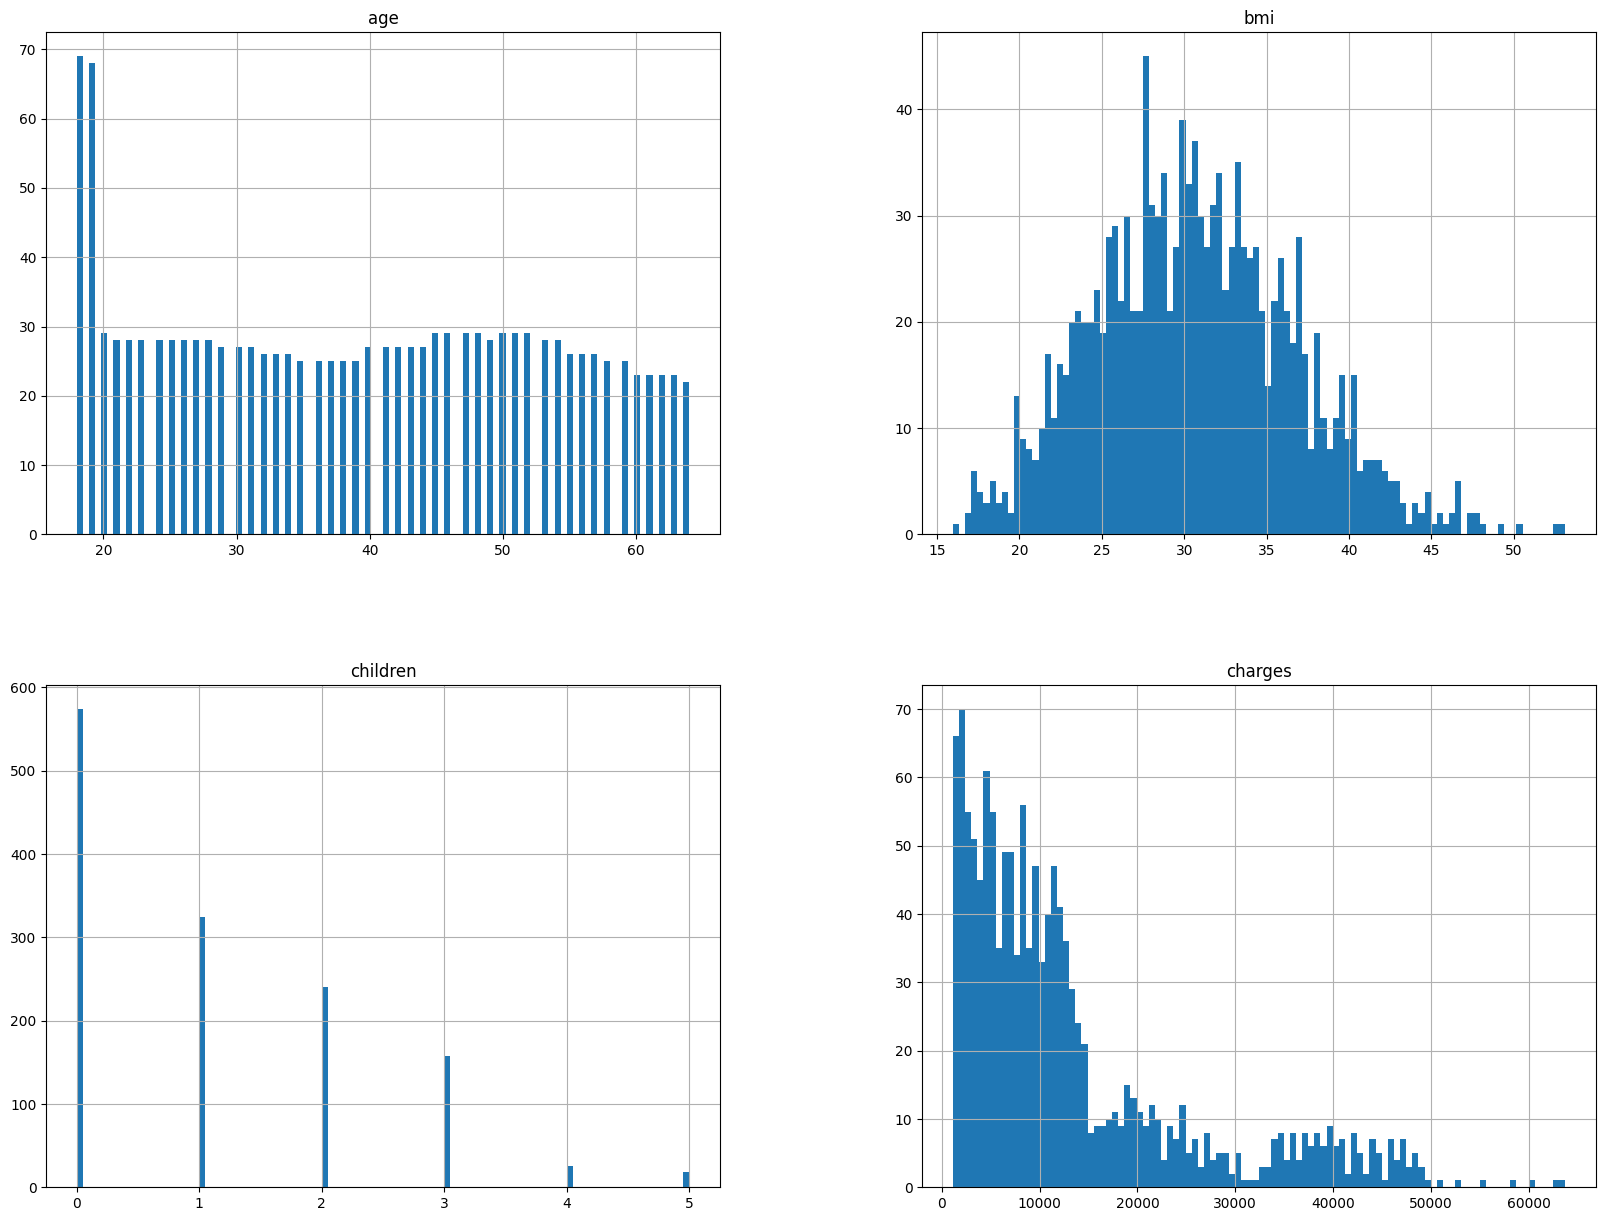

In [64]:
df_charges.hist(bins=100, figsize=(20,15))
plt.show()

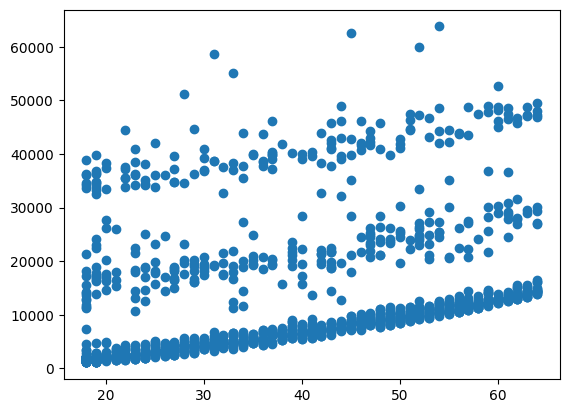

In [66]:
fig, ax = plt.subplots()
ax.scatter(df_charges['age'],df_charges['charges'],)

#### Data Cleaning

> Analisando os dtypes das colunas para identificar se será necessario modificar o tipo das colunas

In [51]:
df_charges.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

> Analise previo dos dados

In [52]:
df_charges.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


> Identificando valores nulos dentro das colunas

In [53]:
df_charges.isna().sum()

age         0
sex         5
bmi         5
children    0
smoker      0
region      0
charges     0
dtype: int64

In [54]:
print('Mostrando os registros aonde a coluna bmi.isna()')
display(df_charges.query('bmi.isna()'))

print('Mostrando os registros aonde a coluna sex.isna()')
display(df_charges.query('sex.isna()'))

Mostrando os registros aonde a coluna bmi.isna()


,age,sex,bmi,children,smoker,region,charges
25,59,female,NaN,3,no,southeast,14001.13380
441,33,female,NaN,0,yes,southwest,37079.37200
761,23,male,NaN,1,no,southwest,2416.95500
1113,28,female,NaN,3,no,northwest,5312.16985
1282,18,female,NaN,0,yes,northeast,14283.45940


Mostrando os registros aonde a coluna sex.isna()


,age,sex,bmi,children,smoker,region,charges
5,31,NaN,25.740,0,no,southeast,3756.62160
141,26,NaN,32.490,1,no,northeast,3490.54910
461,42,NaN,30.000,0,yes,southwest,22144.03200
845,60,NaN,32.450,0,yes,southeast,45008.95550
1324,31,NaN,25.935,1,no,northwest,4239.89265


In [55]:
df_charges['sex'].value_counts()

male      673
female    660
Name: sex, dtype: int64

> Tratando valores ausentes **numericos**

In [56]:
X = df_charges.iloc[:, :-1].values # Variaveis independentes
y = df_charges.iloc[:, -1].values # variável dependente

In [57]:
df_charges.columns

# ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
#   0       1      2        3           4         5         6

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

> Estaremos tratando todas as colunas, tirando a coluna da target

In [58]:
trf1 = ColumnTransformer(transformers =[
    ('categoricos', SimpleImputer(strategy ='most_frequent'), [1, 4, 5]),
    ('numericos', SimpleImputer(strategy ='median'), [0, 2, 3]),
      
], remainder ='passthrough')

In [59]:
first_step = trf1.fit_transform(X )
first_step

array([['female', 'yes', 'southwest', 19.0, 27.9, 0.0],
       ['male', 'no', 'southeast', 18.0, 33.77, 1.0],
       ['male', 'no', 'southeast', 28.0, 33.0, 3.0],
       ...,
       ['female', 'no', 'southeast', 18.0, 36.85, 0.0],
       ['female', 'no', 'southwest', 21.0, 25.8, 0.0],
       ['female', 'yes', 'northwest', 61.0, 29.07, 0.0]], dtype=object)

In [60]:
# > Transformando para dataframe novamente

# df_charges_trat = pd.DataFrame(first_step)

# # Renomeando as colunas
# df_charges_trat.columns = ["sex","smoker","region","age","bmi","children"]

> Verificando se os valores nulos foram resolvidos

In [63]:
pd.DataFrame(first_step).isna().sum() # Resolvido 👌

sex         0
smoker      0
region      0
age         0
bmi         0
children    0
dtype: int64

#### Encoding dos dados categóricos

In [67]:
# Aqui nos estamos aplicando uma codificação, aonde iremos transformar variaveis 
# categoricas (sex, smoker, region) em vetores binarios.
# Estamos mantendo as outras colunas (age, bmi, children) sem nenhuma alteração 
trf2 = ColumnTransformer(transformers =[
    ('enc', OneHotEncoder(), list(range(3))),
], remainder ='passthrough')

In [68]:
second_step = trf2.fit_transform(first_step)
pd.DataFrame(second_step).head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0,27.9,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,33.77,1.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0,33.0,3.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33.0,22.705,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32.0,28.88,0.0
